## Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#np.set_printoptions(threshold=np.inf,linewidth=np.inf) # numpy array를 생략하지않고 전체 출력
import seaborn as sns

Init Plugin
Init Graph Optimizer
Init Kernel


### 1. Data

In [2]:
train_data=pd.read_csv('/Users/leesangmin/Desktop/a/train.csv')
test=pd.read_csv('/Users/leesangmin/Desktop/a/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info() # 데이터의 NAN 개수를 확인 가능 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1-1. 데이터 전처리

In [6]:
print('train data의 Age의 nan값의 개수 : {}'.format(train_data.Age.isna().sum())) # train_data.nan 값의 개수를 확인


train data의 Age의 nan값의 개수 : 177


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

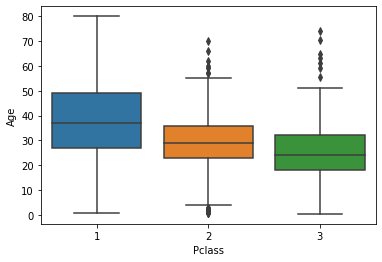

In [7]:
sns.boxplot(x='Pclass',y='Age',data=train_data) # Pclass에 따른 나이를 그래프로 확인, 나이의 nan값을 채워주기 위함

#### 1-1-1. Age를 처리하는 과정

In [8]:
### Age가 nan 값인 데이터를 채워주는 과정. 위의 Pclass와 Age와의 관계 그래프를 통해 집어넣어줌
def nanAge(data): 
    
    if np.isnan(data.Age):

        if data.Pclass==1:
            return 36
        
        elif data.Pclass==2:
            return 29
        else:
            return 25

    else:
        return data.Age
        

In [9]:
train_data['Age']=train_data[['Age','Pclass']].apply(nanAge,axis=1) # Age의 nan값을 넣어줌

print('train data의 Age의 nan값의 개수 : {}'.format(train_data.Age.isna().sum())) # train_data.Age의 nan 값의 개수를 확인

train data의 Age의 nan값의 개수 : 0


In [10]:
train_data.info() # train_data의 Age에 nan값이 없음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 1-1-2. train data Embarked를 처리  

In [11]:
## train_data의 Embarked에도 두개의 nan값이 있음.데이터가 2개뿐이니 Embarked의 첫번째 값과 같다고 놓았음(S와 같아짐)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True) 


max(train_data['Age']) 

80.0

In [12]:
# Fare을 5구간으로 나누기 위해 구간을 확
pd.qcut(train_data['Fare'],5).value_counts() 

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

#### 1-1-3. 사용할 변수들을 추출

In [13]:
### pandas의 각 열을 제거해서 data로 활용하여도 되지만, numpy array형태로 바꿔주었음. Survived or dead를 분석하기위해 Pclass, Sex, Age, Embarked, Fare, SibSp, Parch를 사용
def predata(data):
    sex=[]
    embark=[]
    age=[]
    family=[]
    fare=[]
    for i in range(len(data)):

        if data.Sex[i]=='male': # Sex는 문자열 데이터이므로, 정수형 숫자로 변경을해줌
            a=1
        else:
            a=0

        if data.Age[i]<=16: # 나이를 5등분을 함. train_data의 Age의 데이터의 최대값이 80이므로, 이를 5등분함
            b=0
        
        elif data.Age[i]<=32: # 나이의 데이터는 0~80까지 넓은 분포를 가지기 때문에 구간을 나누어서 해야만 했음
            b=1
        
        elif data.Age[i]<=48:
            b=2
        elif data.Age[i]<=64:
            b=3
        else:
            b=4

            
        if data.Embarked[i]=="C": # Embarked는 총 3개의 문자열로 되어있음. 이를 정수형 숫자로 변경
            c=0
        elif data.Embarked[i]=="Q":
            c=1
        else:
            c=2


        if data.SibSp[i]+data.Parch[i]+1 ==1: # SibSp는 동반한 형제/자매/배우자를 의미. Parch는 동반한 부모/자식 수 이므로 둘을 합쳐 가족으로함. 혼자 온 사람과 안온사람의 구분을 지음
            d=0
        else:
            d=1

        if data.Fare[i]<=8: # Fare은 요금으로,5구간으로 나눠주었음
            e=0
        elif data.Fare[i]<=11:
            e=1
        elif data.Fare[i]<=21.2:
            e=2
        elif data.Fare[i]<=40:
            e=3
        else:
            e=4

        ## 빈 list에 값들을  채워넣음
        sex.append(a)
        age.append(b)
        embark.append(c)
        family.append(d)
        fare.append(e)

    ## 사용할 변수들을 추출하여 한 열의 array로 변경해주는 과정 
    family=np.array(family).reshape(-1,1)
    sex=np.array(sex).reshape(-1,1)
    fare=np.array(fare).reshape(-1,1)
    pclass=np.array(data.Pclass).reshape(-1,1) # Pclass는 변경하지않아도 정수형데이터로 총 3개 존재하기 때문에 if문을 사용하지 않음
    age=np.array(age).reshape(-1,1)
    embark=np.array(embark).reshape(-1,1)

    ## 사용할 변수들을 모두 하나의 열로 추출하였으니 이를 하나의 array로 합치는 과정
    X=np.concatenate((age,sex,family,pclass,embark,fare),axis=1) 
    return X

In [14]:
## X는 위의 predata 함수로 추출한 사용할 변수들을 array로 추출한것, y는 target으로 Survived or Dead를 의미 
X=predata(train_data)
y=np.array(train_data.Survived).reshape(-1,1)

print(X) # 각 열이 x_n으로 neural network를 만들기 위함.

[[1 1 1 3 2 0]
 [2 0 1 1 0 4]
 [1 0 0 3 2 0]
 ...
 [1 0 1 3 2 3]
 [1 1 0 1 0 3]
 [1 1 0 3 1 0]]


### 2. Model(input=6, output=1,) Binary Classification

In [15]:
epoch=150
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 32, input_shape = (6,), activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal')) # kernal_initializer은 weight를 초기화하는방법. 그중 he_normal을 택함

model.add(tf.keras.layers.BatchNormalization()) # 학습 과정을 안정화 시키기 위하여 BatchNormalization을 진행

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 512, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(units = 512, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 256, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2)) # overfitting이 많이 일어나므로, Dropout을 여러층을 이용하였음

model.add(tf.keras.layers.Dense(units = 16, activation = 'relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))) # L2 regulation을 사용함
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units =1 , activation = 'sigmoid')) # 0과 1을 분류하는 문제와 같으므로(Survived or Dead) sigmoid를 이용하여 분류함

model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-21 15:07:44.540033: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-21 15:07:44.540597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

### 3. Loss and Optimizer (loss= binary CE , optimizer= SGD)

In [16]:
### 0-1을 분류하는것이므로 binary_CE를 loss function으로 이용, optimizer은 Adam,SGD를 learning_rate를 바꾸어가며 설정 할 수도 있음
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy']) 

### 4. Train (validation=0.2)

In [17]:
history=model.fit(X,y,epochs=epoch,batch_size=32,validation_split=0.2)

Epoch 1/150


2021-12-21 15:07:45.032150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-21 15:07:45.035435: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-21 15:07:45.667799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 1.1262 - accuracy: 0.5393

2021-12-21 15:07:47.822491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 76ms/step - loss: 1.1262 - accuracy: 0.5393 - val_loss: 1.4046 - val_accuracy: 0.3464
Epoch 2/150
23/23 [==============================] - 1s 55ms/step - loss: 0.9856 - accuracy: 0.6011 - val_loss: 1.0071 - val_accuracy: 0.5475
Epoch 3/150
23/23 [==============================] - 1s 51ms/step - loss: 0.9469 - accuracy: 0.6320 - val_loss: 0.9966 - val_accuracy: 0.4581
Epoch 4/150
23/23 [==============================] - 1s 55ms/step - loss: 0.9131 - accuracy: 0.6067 - val_loss: 0.8229 - val_accuracy: 0.6648
Epoch 5/150
23/23 [==============================] - 2s 67ms/step - loss: 0.8643 - accuracy: 0.6447 - val_loss: 0.8361 - val_accuracy: 0.6983
Epoch 6/150
23/23 [==============================] - 1s 58ms/step - loss: 0.8408 - accuracy: 0.6699 - val_loss: 0.7961 - val_accuracy: 0.7095
Epoch 7/150
23/23 [==============================] - 2s 67ms/step - loss: 0.8653 - accuracy: 0.6756 - val_loss: 0.8293 - val_accuracy: 0.6648
Epoch 8/150
23/23 

### 5. Result

In [18]:
### train 한 결과중 정확도, 손실을 출력 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

### 5.1 Loss Plot

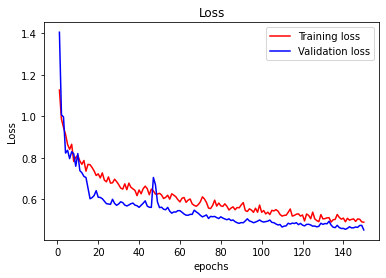

In [19]:
epochs=np.arange(1,len(acc)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()   

### 5.2. Acc plot

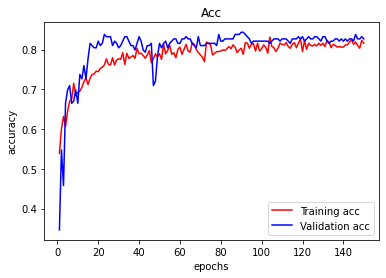

In [20]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

### 6. Test

In [21]:
test.info() # test 데이터는 위에서 사용한 변수중 Age와 Fare에 nan값이 존재하는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 6-1. Test 데이터 전처리

In [23]:
print('test data의 Age의 nan값의 개수 : {}'.format(test.Age.isna().sum())) # train_data.nan 값의 개수를 확인

test data의 Age의 nan값의 개수 : 86


In [24]:
test['Age']=test[['Age','Pclass']].apply(nanAge,axis=1)

print('test의 Age의 nan값의 개수 : {}'.format(test.Age.isna().sum())) # train_data.Age의 nan 값의 개수를 확인

test의 Age의 nan값의 개수 : 0


In [25]:
test['Fare'].fillna(test['Fare'].mode()[0], inplace = True) # test 데이터의 Fare값은 1개. 이를 첫번째 데이터와 같다고 보았음

### 6-2. Testing

In [26]:
X_t=predata(test)

In [27]:
print(X_t) # test를 진행한 test 데이터를 출력

[[2 1 0 3 1 0]
 [2 0 1 3 2 0]
 [3 1 0 2 1 1]
 ...
 [2 1 0 3 2 0]
 [1 1 0 3 2 1]
 [1 1 1 3 0 3]]


In [28]:
predict=model.predict(X_t) # model에 이 test data를 집어넣어 Survived or dead를 확인 

2021-12-21 15:11:06.657816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [29]:
predict=(predict>0.5).astype(int).ravel() # sigmoid는 0또는 1을 출력하는 것이 아니기 때문에 반올림을 해주어야 함 


In [30]:
predict=predict.tolist() # array로 진행을 하였기 때문에 이를 list로 변환 


In [31]:
predict  # Survived or Dead를 1차원 list로 출력하는것을 확인

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


### 7. submission 

In [32]:
submit=pd.DataFrame({"PassengerID":test.PassengerId,"Survived":predict}) 
submit.to_csv("final_submission.csv",index=False)

## 8. Report 

http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/  # bias-variance decomposition에 대한 참고자료

neural network(nn)을 택한 이유는 epoch, batch_size, optimizer, regulation, kernal_initializer을 계속해서 바꾸어주면서 train을 진행해 볼 수 있기 때문이었다.
sklearn을 활용하여 decision tree, SVC, perceptron, K-Means 등 많은 분류 문제 풀이 방법을 활용하여 간단하게 모델을 구현 할 수 있지만, nn의 구조와 파라미터들의 변화 양상을 알 수 없기 때문에 nn을 활용하기위해 pytorch와 tensorflow중 고민하다 pytorch는 익숙하지 않아 tensorflow를 채택하여 사용하였다.

이 타이타닉 데이터를 이용한 Survived or Dead 문제를 풀기 위해선 데이터 전처리과정과 모델을 구현하는데 있어서 많은 시행착오가 필요하였다. 같은 전처리과정을 Dropout과 같은 것을 추가만 하여도 정확도가 크게 바뀌었고, 모델의 acc와 loss가 아무리 잘 나왔다 치더라도, kaggle에 제출하였을 땐 스코어가 낮은 경우도 허다하였기 때문에 어떤 데이터가 연관이 있을지 없을지를 생각하고, 모델을 최대한 다양한 방법으로 구현해야만 했다. 또한 optimizer도 SGD를 이용했을때와 Adam을 이용했을 때 loss가 떨어지는게 전혀 달랐고, optimizer의 learning_rate를 조절하여 최적의 조건을 찾는것도 쉽지 않았다. 

모델을 아주 작고 간단하게 구성하였을 때 train이 아주 잘되었는데, hidden layer을 증가하면 할수록 모델의 variance가 증가하여 validation loss와 acc가 계속해서 진동하는 현상이 발생하였는데, 이를 해결해 가면서 모델을 구현해 보고 싶어 hidden layer의 크기를 계속해서 늘려가면서 relu를 넣어 모델을 크게 만드는 대신 weight decay를 줘 모델을 스무딩 시켜주는 방법으로 진행하였다. 모델의 크기를 키울수록 kaggle의 score도 증가함을 확인하였다.

데이터 전처리 과정에서 Cabin, Name, Ticket는 아에 이 문제에서 필요하지 않다고 판단하고 제거하였지만, kaggle에 있는 스코어가 높은 코드들은 이들까지 포함하여 트레인을 한 경우도 있었다. 또한 각각의 데이터를 분류하는것이 아닌 Age-Sex, Age-Pclass, Fare-Pclass 등 두 가지 이상의 데이터를 묶어서 관계성을 따지는 방법도 꽤 많이 존재하였다.

지금 만든 데이터 전처리에서 Sex, Pclass, Embarked 등은 one-hot encoding을 통해 데이터를 더 세부적으로 나눈 후 모델을 차라리 hidden layer을 축소시키는 과정으로 정확도를 더 높일 수 있을거라고 생각된다.



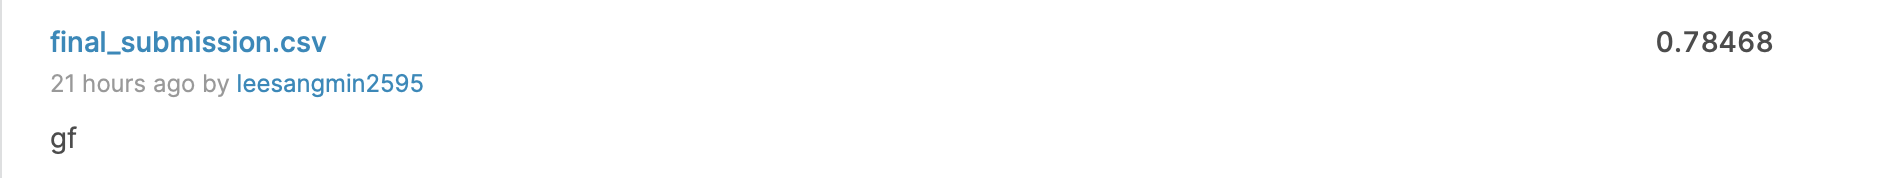

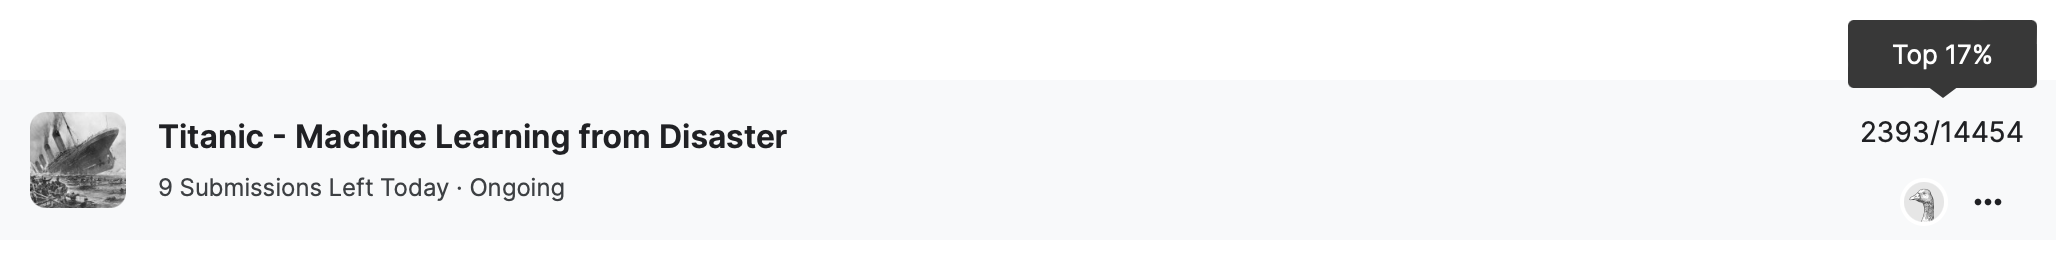